In [1]:
import nvjpeg
import numpy as np
from time import time
import os
from typing import *
import pathlib
from matplotlib import cm as matplotlib_color_map
from utils import *

from bokeh.layouts import column
from bokeh.models import Slider
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models.mappers import LogColorMapper
from nvjpeg import NvJpeg
import cv2
from matplotlib import pyplot as plt


output_notebook()

Loading BokehJS ...

In [2]:
memmap_path = '/home/kushal/meso-data/020ee829-b1ea-4a25-bb2f-ba9625cb8915-m1_els__d1_512_d2_512_d3_1_order_F_frames_11200_.mmap'
Yr, dims, T = load_memmap(memmap_path)
images = np.reshape(Yr.T, [T] + list(dims), order='F')

In [3]:
max_img_val = 9300 # approximate max value in the image, upper limit of cmap
lut = np.zeros(shape=((max_img_val), 1, 3), dtype=np.uint8)
cmap = np.vstack(auto_colormap(n_colors=(max_img_val), cmap='gnuplot2'))
lut[:, 0, :] = cmap[:, :-1] * 255

In [4]:
nj = NvJpeg()

def to_jpeg(img, quality=50):
    img = img - 2000 # lower limit of the cmap
    j_img = nj.encode(lut[img.astype(int)][:, :, 0, :], quality)
    # return nj.decode(j0)
    return cv2.cvtColor(nj.decode(j_img), cv2.COLOR_BGR2BGRA)

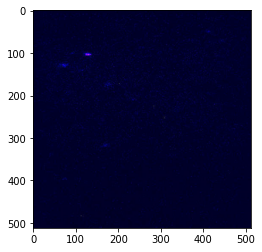

In [5]:
plt.imshow(to_jpeg(images[0]))

In [6]:
def bkapp(doc):   
    p = figure(plot_height=512, plot_width=512)#, output_backend='webgl')
    p.grid.grid_line_width = 0
    
    j = to_jpeg(images[0])
    j = j.view(dtype=np.uint32).reshape((512, 512))

    g = p.image_rgba([j], x=0, y=0, dw=20, dh=20, level="image")
    # g.glyph.color_mapper = color_mapper
    def update(attr, old, val):
        frame = to_jpeg(images[val])
        frame = frame.view(dtype=np.uint32).reshape((512, 512))
        g.data_source.data['image'] = [frame]
    
    s = Slider(start=0, end=11000, value=1, step=10, title="Frame index:")
    s.on_change('value', update)
    # doc.add_root(p)
    doc.add_root(column(p, s))

In [11]:
show(bkapp, notebook_url="http://localhost:8866")

ERROR:bokeh.server.protocol_handler:error handling message
 message: Message 'PATCH-DOC' content: {'events': [{'kind': 'ModelChanged', 'model': {'id': '1103'}, 'attr': 'value', 'new': 970}], 'references': []} 
 error: IndexError('index 9255 is out of bounds for axis 0 with size 9000')
Traceback (most recent call last):
  File "/home/kushal/python-venvs/nvjpeg/lib/python3.8/site-packages/bokeh/server/protocol_handler.py", line 97, in handle
    work = await handler(message, connection)
  File "/home/kushal/python-venvs/nvjpeg/lib/python3.8/site-packages/bokeh/server/session.py", line 93, in _needs_document_lock_wrapper
    result = func(self, *args, **kwargs)
  File "/home/kushal/python-venvs/nvjpeg/lib/python3.8/site-packages/bokeh/server/session.py", line 287, in _handle_patch
    message.apply_to_document(self.document, self)
  File "/home/kushal/python-venvs/nvjpeg/lib/python3.8/site-packages/bokeh/protocol/messages/patch_doc.py", line 115, in apply_to_document
    invoke_with_curdo